[Reference](https://medium.com/grabngoinfo/explainable-s-learner-uplift-model-using-python-package-causalml-a3c2bed3497c)

# Step 1: Install and Import Libraries

In [1]:
# Install package
!pip install causalml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 535 kB 5.0 MB/s 
     |████████████████████████████████| 76 kB 5.3 MB/s 
     |████████████████████████████████| 575 kB 49.2 MB/s 
     |████████████████████████████████| 1.8 MB 48.1 MB/s 
     |████████████████████████████████| 727 kB 61.4 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 132 kB 58.9 MB/s 
  Created wheel for causalml: filename=causalml-0.13.0-cp38-cp38-linux_x86_64.whl size=1482447 sha256=d16a3cbdfdd6aa38b3d280ea5eeeb8d836726b88e4b4bf81cb80155ef68cd892
  Stored in directory: /root/.cache/pip/wheels/69/88/0f/dacafa2cf04c6eeea7172fb8f4d41b82330f5ec9edf807d167
Successfully built causalml


In [2]:
# Data processing
import pandas as pd
import numpy as np

# Create synthetic data
from causalml.dataset import synthetic_data

# Visualization
import seaborn as sns

# Machine learning model
from causalml.inference.meta import LRSRegressor, BaseSRegressor
from xgboost import XGBRegressor

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


# Step 2: Create Dataset

In [3]:
# Set a seed for reproducibility
np.random.seed(42)

# Create a synthetic dataset
y, X, treatment, ite, _, _ = synthetic_data(mode=1, n=1000, p=5, sigma=1.0)

feature_names = ['X1', 'X2', 'X3', 'X4', 'X5']

In [4]:
# Check treatment vs. control counts
pd.Series(treatment).value_counts()

1    512
0    488
dtype: int64

In [5]:
# True ATE
ite.mean()

0.4982285515450249

# Step 3: S-Learner Average Treatment Effect (ATE)

In [6]:
# Use LRSRegressor
lr = LRSRegressor()

# Estimated ATE, upper bound, and lower bound
te, lb, ub = lr.estimate_ate(X, treatment, y)

# Print out results
print('Average Treatment Effect (Linear Regression): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Average Treatment Effect (Linear Regression): 0.65 (0.50, 0.80)


In [8]:
# Use XGBRegressor with BaseSRegressor
xgb = BaseSRegressor(XGBRegressor(random_state=42))

# Estimated ATE, upper bound, and lower bound
te, lb, ub = xgb.estimate_ate(X, treatment, y, return_ci=True)

# Print out results
print('Average Treatment Effect (Linear Regression): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

[00:17:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average Treatment Effect (Linear Regression): 0.47 (0.37, 0.57)


# Step 4: S-Learner Individual Treatment Effect (ITE)

In [9]:
# ITE
xgb_ite = xgb.fit_predict(X, treatment, y)

# Take a look at the data
print('\nThe first five estimated ITEs are:\n', np.matrix(xgb_ite[:5]))

[00:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

The first five estimated ITEs are:
 [[ 0.53507471]
 [-0.03358769]
 [-0.04331005]
 [ 0.20249051]
 [ 0.53742391]]


In [10]:
# ITE with confidence interval
xgb_ite, xgb_ite_lb, xgb_ite_ub = xgb.fit_predict(X=X, treatment=treatment, y=y, return_ci=True,
                               n_bootstraps=100, bootstrap_size=500)

# Take a look at the data
print('\nThe first five estimated ITEs are:\n', np.matrix(xgb_ite[:5]))
print('\nThe first five estimated ITE lower bound are:\n', np.matrix(xgb_ite_lb[:5]))
print('\nThe first five estimated ITE upper bound are:\n', np.matrix(xgb_ite_ub[:5]))

[00:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  2%|▏         | 2/100 [00:00<00:05, 17.92it/s]

[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  5%|▌         | 5/100 [00:00<00:05, 18.92it/s]

[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  8%|▊         | 8/100 [00:00<00:04, 19.96it/s]

[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 10%|█         | 10/100 [00:00<00:04, 19.74it/s]

[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 13%|█▎        | 13/100 [00:00<00:04, 20.01it/s]

[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 15%|█▌        | 15/100 [00:00<00:04, 19.13it/s]

[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 18%|█▊        | 18/100 [00:00<00:04, 19.85it/s]

[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 20%|██        | 20/100 [00:01<00:04, 19.83it/s]

[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 22%|██▏       | 22/100 [00:01<00:04, 18.79it/s]

[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 24%|██▍       | 24/100 [00:01<00:04, 15.88it/s]

[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 26%|██▌       | 26/100 [00:01<00:05, 13.94it/s]

[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 28%|██▊       | 28/100 [00:01<00:05, 12.12it/s]

[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 30%|███       | 30/100 [00:01<00:06, 11.52it/s]

[00:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 34%|███▍      | 34/100 [00:02<00:05, 11.68it/s]

[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 36%|███▌      | 36/100 [00:02<00:05, 11.54it/s]

[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 40%|████      | 40/100 [00:02<00:05, 11.48it/s]

[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 42%|████▏     | 42/100 [00:02<00:05, 10.95it/s]

[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 44%|████▍     | 44/100 [00:03<00:05, 10.55it/s]

[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 46%|████▌     | 46/100 [00:03<00:04, 10.88it/s]

[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 50%|█████     | 50/100 [00:03<00:05,  9.93it/s]

[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 52%|█████▏    | 52/100 [00:04<00:04, 10.02it/s]

[00:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 54%|█████▍    | 54/100 [00:04<00:04, 10.26it/s]

[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 56%|█████▌    | 56/100 [00:04<00:04,  9.39it/s]

[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 58%|█████▊    | 58/100 [00:04<00:04, 10.13it/s]

[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 62%|██████▏   | 62/100 [00:04<00:03, 10.45it/s]

[00:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 64%|██████▍   | 64/100 [00:05<00:03, 10.66it/s]

[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 68%|██████▊   | 68/100 [00:05<00:03, 10.13it/s]

[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 70%|███████   | 70/100 [00:05<00:02, 10.07it/s]

[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 73%|███████▎  | 73/100 [00:06<00:02,  9.56it/s]

[00:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 75%|███████▌  | 75/100 [00:06<00:02,  9.09it/s]

[00:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 77%|███████▋  | 77/100 [00:06<00:02,  9.18it/s]

[00:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 79%|███████▉  | 79/100 [00:06<00:02,  8.21it/s]

[00:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 81%|████████  | 81/100 [00:07<00:02,  8.01it/s]

[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 83%|████████▎ | 83/100 [00:07<00:01,  8.52it/s]

[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 88%|████████▊ | 88/100 [00:07<00:00, 14.45it/s]

[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 94%|█████████▍| 94/100 [00:07<00:00, 18.51it/s]

[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 97%|█████████▋| 97/100 [00:07<00:00, 18.61it/s]

[00:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 100/100 [00:08<00:00, 12.29it/s]

[00:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

The first five estimated ITEs are:
 [[ 0.53507471]
 [-0.03358769]
 [-0.04331005]
 [ 0.20249051]
 [ 0.53742391]]

The first five estimated ITE lower bound are:
 [[ 0.08227151]
 [-0.60897052]
 [-0.41699027]
 [-0.15284285]
 [ 0.12823942]]

The first five estimated ITE upper bound are:
 [[0.9885146 ]
 [0.50681158]
 [0.85921164]
 [0.83486686]
 [0.98535124]]


In [11]:
# Estimate ATE
xgb_ite.mean()

0.4727874168455601

# Step 5: S-Learner Model Feature Importance

In [12]:
# Feature importance using auto
xgb.get_importance(X=X, tau=xgb_ite, normalize=True, method='auto', features=feature_names)

{1: X1    0.489546
 X3    0.167439
 X4    0.159123
 X2    0.135098
 X5    0.048795
 dtype: float64}

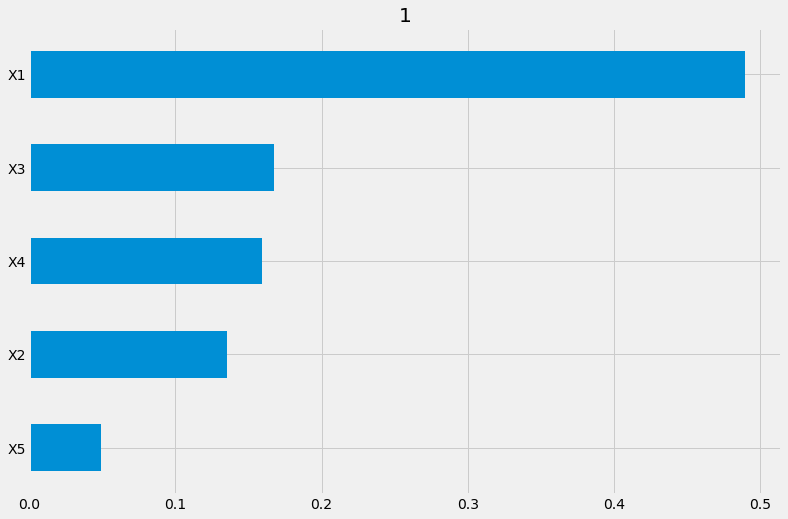

In [13]:
# Visualization
xgb.plot_importance(X=X, tau=xgb_ite, normalize=True, method='auto', features=feature_names)

In [14]:
# Feature importance using permutation
xgb.get_importance(X=X, tau=xgb_ite, method='permutation', features=feature_names, random_state=42)

{1: X1    0.900729
 X4    0.428106
 X3    0.312299
 X2    0.238978
 X5    0.103642
 dtype: float64}

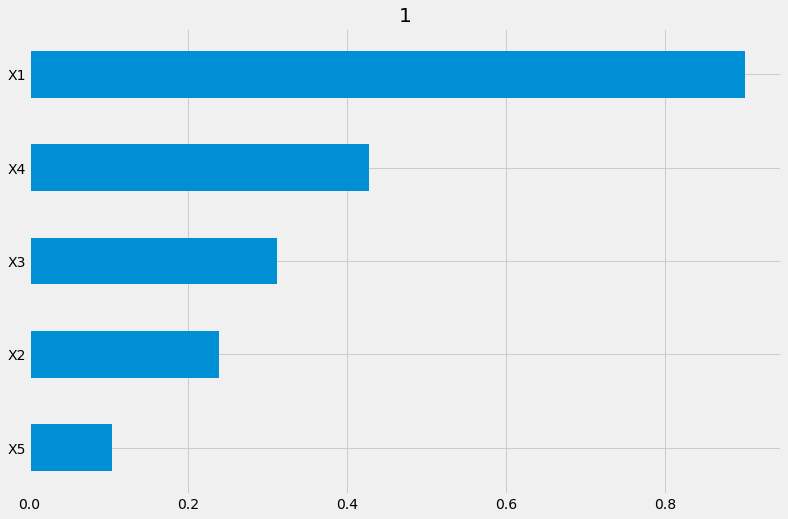

In [15]:
# Visualization
xgb.plot_importance(X=X, tau=xgb_ite, method='permutation', features=feature_names, random_state=42)

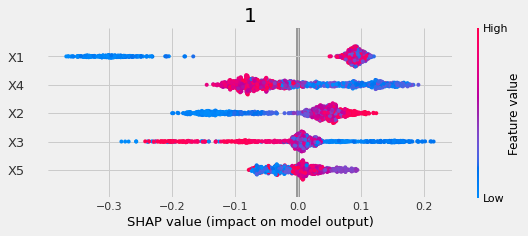

In [16]:
# Plot shap values
xgb.plot_shap_values(X=X, tau=xgb_ite, features=feature_names)

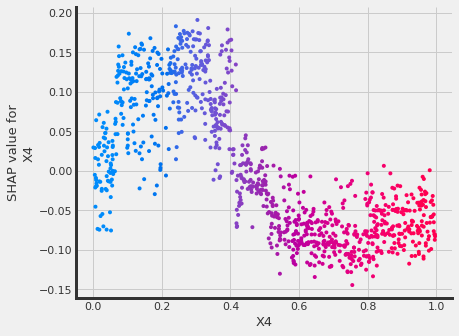

In [17]:
# SHAP dependence plot
xgb.plot_shap_dependence(treatment_group=1, 
                         feature_idx=3,
                         X=X,
                         tau=xgb_ite,
                         interaction_idx=3,
                         features=feature_names)

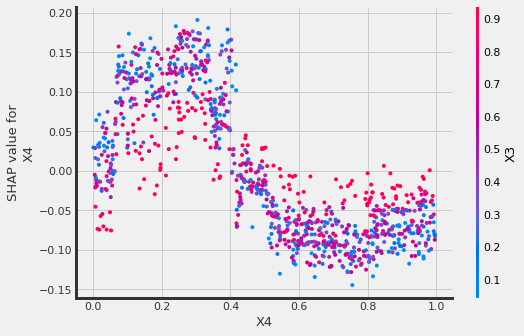

In [18]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
xgb.plot_shap_dependence(treatment_group=1, 
                         feature_idx=3,
                         X=X,
                         tau=xgb_ite,
                         interaction_idx='auto',
                         features=feature_names)